## Compute overall fraction of acceptable / unacceptable

In [131]:
import pandas as pd
df = pd.read_csv('../data/interim/data.csv')

In [123]:
metrics = {
    'acceptable': (df['Acceptable'] == 0).sum(),
    'unacceptable': (df['Acceptable'] == 1).sum()
}

In [124]:
print(metrics)

{'acceptable': 1920, 'unacceptable': 195}


## Fraction versus length

In [132]:
total = df.groupby(['Time']).size()
acceptable = df.groupby(['Time'])['Acceptable'].sum()

metrics2 = {}
for time, total in total.items():
    metrics2[time] = acceptable[time] / total
print(metrics2)

{8.64: 0.0, 10.4: 0.05263157894736842, 11.84: 0.0, 13.2: 0.0375, 16.64: 0.006060606060606061, 16.8: 0.05263157894736842, 22.88: 0.011764705882352941, 23.68: 0.022222222222222223, 24.64: 0.0, 25.92: 0.16842105263157894, 26.34: 0.3, 28.98: 0.0625, 31.2: 0.12631578947368421, 32.96: 0.06666666666666667, 35.04: 0.12222222222222222, 36.16: 0.031578947368421054, 37.04: 0.02666666666666667, 38.4: 0.06666666666666667, 40.0: 0.3, 48.64: 0.21052631578947367, 49.6: 0.09333333333333334, 50.08: 0.1, 65.44: 0.3333333333333333}


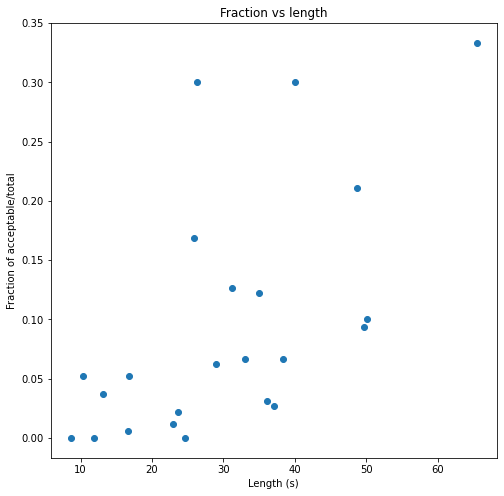

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
x = metrics2.keys()
y = metrics2.values()
plt.xlabel('Length (s)')
plt.ylabel('Fraction of acceptable/total')
plt.title('Fraction vs length')
plt.scatter(x, y)

## Fraction per game

In [127]:
total = df.groupby(['Game']).size()
acceptable = df.groupby(['Game'])['Acceptable'].sum()
metrics3 = {}
for game, total in total.items():
    metrics3[game] = acceptable[game] / total
print(metrics3)

{'apex': 0.12105263157894737, 'civ6': 0.18333333333333332, 'csgo': 0.08947368421052632, 'fortnite': 0.032432432432432434, 'gta': 0.1111111111111111, 'hearthstone': 0.025, 'lol': 0.0058823529411764705, 'minecraft': 0.11052631578947368, 'odyssey': 0.06, 'overwatch': 0.0, 'pubg': 0.18125, 'rainbow6': 0.17777777777777778}


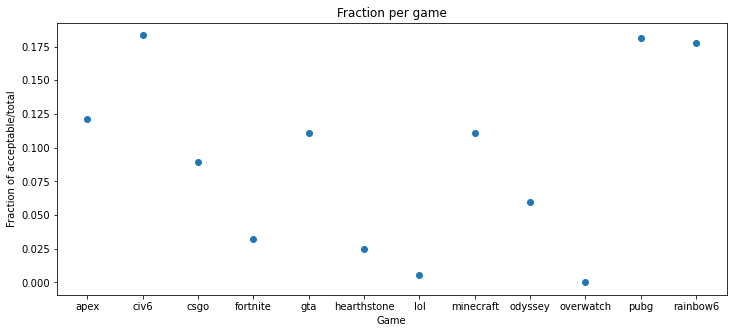

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
x = metrics3.keys()
y = metrics3.values()
plt.xlabel('Game')
plt.ylabel('Fraction of acceptable/total')
plt.title('Fraction per game')
plt.scatter(x, y)

## Fraction per game load vs launch

In [129]:
acceptable = df.groupby(['Game', 'Type'])['Acceptable'].sum()
total = df.groupby(['Game', 'Type'])['Acceptable'].size()
metrics4 = {}
for info, n_acceptable in acceptable.items():
    if info[1] not in metrics4:
        metrics4[info[1]] = {}
    metrics4[info[1]][info[0]] = n_acceptable / total[info]

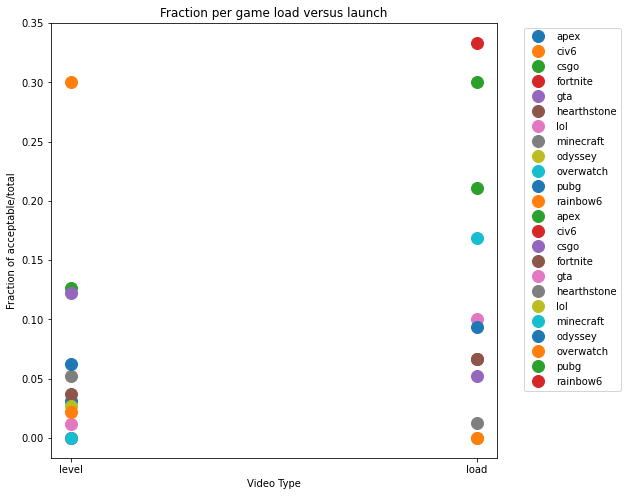

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
x = metrics4.keys()
y = metrics4.values()
plt.xlabel('Video Type')
plt.ylabel('Fraction of acceptable/total')
plt.title('Fraction per game load versus launch')
for sim_type in metrics4:
    m = metrics4[sim_type]
    for game in m:
        stat = m[game]
        plt.plot(sim_type, stat, marker='o', linestyle='', ms=12, label=game)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


## Fraction versus scaling (25-125)

In [138]:
total = df.groupby(['Speed']).size()
acceptable = df.groupby(['Speed'])['Acceptable'].sum()

metrics2 = {}
for speed, total in total.items():
    metrics2[speed] = acceptable[speed] / total
print(metrics2)

{25: 0.02364066193853428, 50: 0.016548463356973995, 75: 0.0591016548463357, 100: 0.13947990543735225, 125: 0.2222222222222222}


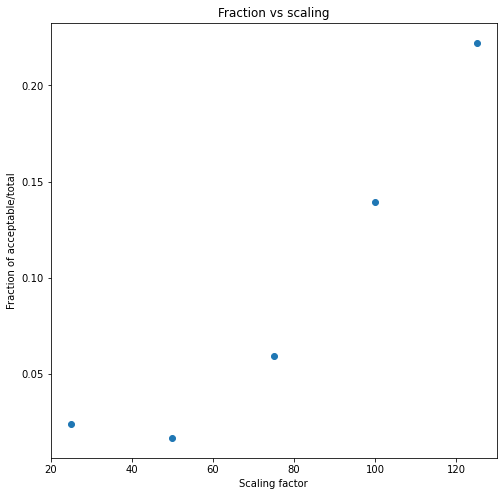

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
x = metrics2.keys()
y = metrics2.values()
plt.xlabel('Scaling factor')
plt.ylabel('Fraction of acceptable/total')
plt.title('Fraction vs scaling')
plt.scatter(x, y)